In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from flamespread import *
from dataset_handler import *
#reload
%load_ext autoreload
%autoreload 2

In [2]:
exp_name ='lfs_pmma_DE_6mm_tc_R1_0001'
# exp_name2 ='lfs_pmma_DE_6mm_tc_R2_0001'
dewarped_data= get_dewarped_data(exp_name)
edge_results1 = get_edge_results(exp_name)
# edge_results2 = get_edge_results(exp_name2)


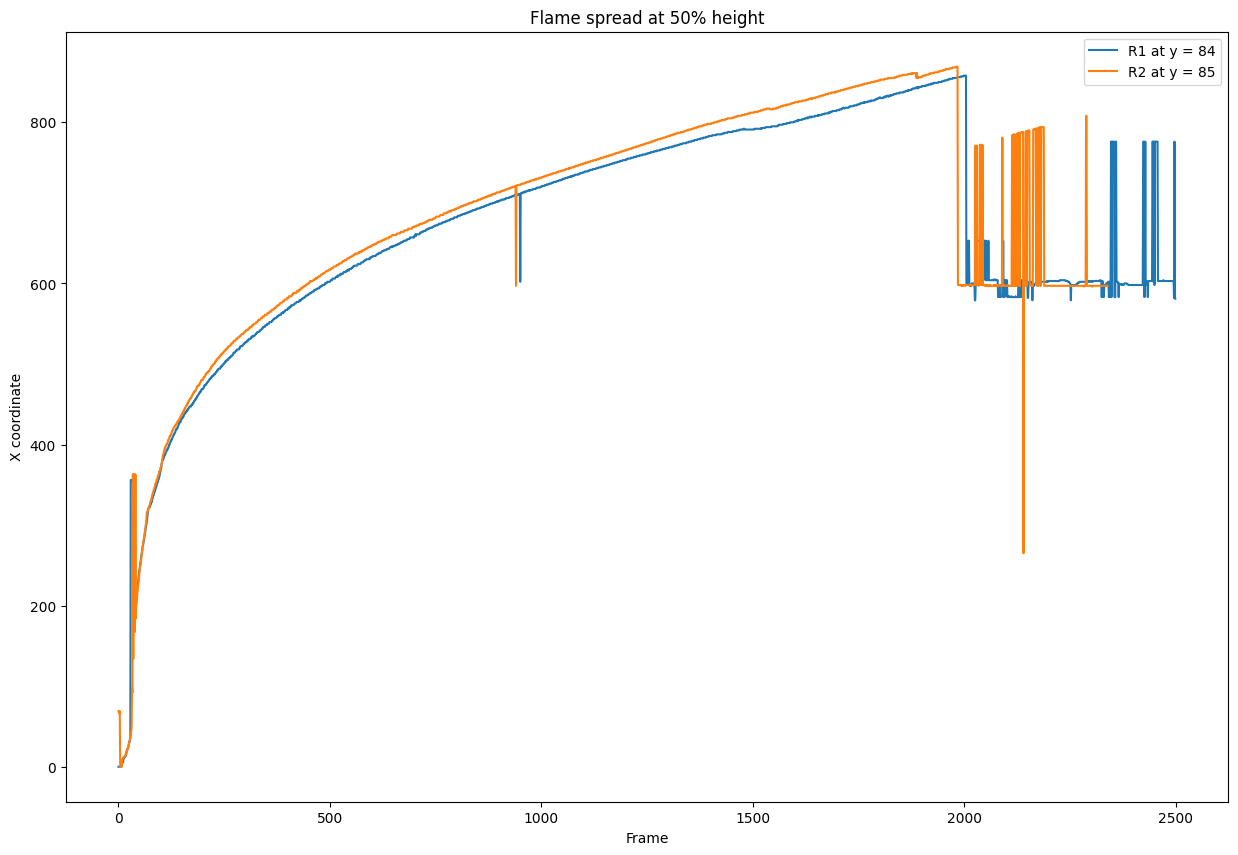

In [22]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
y1 = edge_results1.shape[1]//2
y2 = edge_results2.shape[1]//2
y1 = -y1 -1
y2 = -y2 -1
ax.plot(edge_results1.T[y1],label='R1 at y = {}'.format(-y1))
ax.plot(edge_results2.T[y2],label='R2 at y = {}'.format(-y2))
ax.set_title('Flame spread at 50% height')
ax.set_xlabel('Frame')
ax.set_ylabel('X coordinate')
ax.legend()


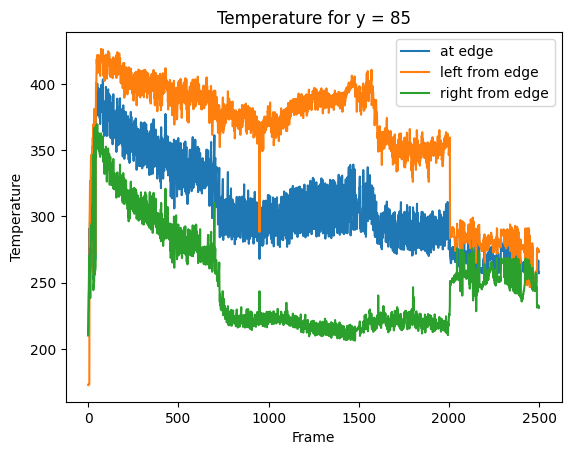

In [24]:
idx = edge_results1.T[85]
temp = dewarped_data[85,:,:]
plt.plot(temp[idx,range(len(idx))],label='at edge')
plt.plot(temp[idx-3,range(len(idx))],label='left from edge')
right_idx = [min(i+3,860) for i in idx]
plt.plot(temp[right_idx,range(len(idx))],label='right from edge')
plt.title('Temperature for y = 85')
plt.xlabel('Frame')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [39]:
frame_number = 36

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: title={'center': 'Frame 36'}>)

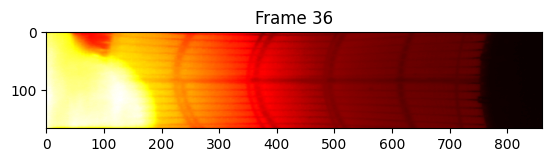

In [40]:
show_frame(dewarped_data,frame_number)


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: title={'center': 'Flame contour at frame 36'}>)

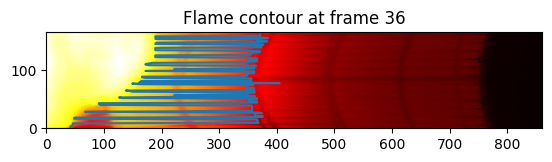

In [41]:
show_flame_contour(dewarped_data,edge_results_rolled,frame_number)


(167, 861)


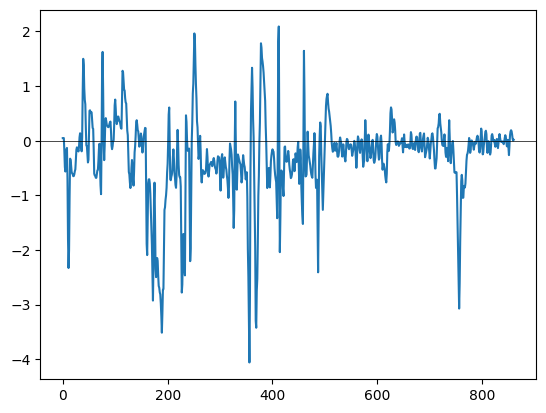

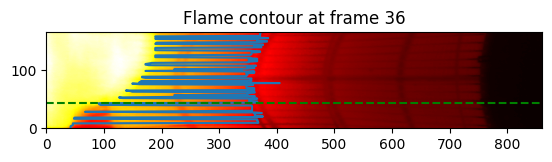

In [42]:
print(get_frame(dewarped_data,frame_number).shape)
y = 130
plot_gradient(get_frame(dewarped_data,frame_number),y)
show_flame_contour(dewarped_data,edge_results_rolled,frame_number)
plt.axhline(y=173-y, color='g', linestyle='--')
plt.show()

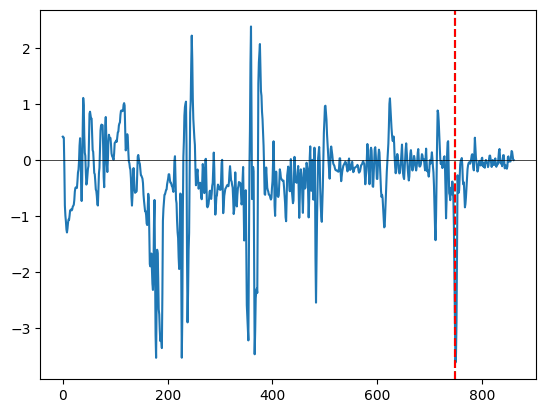

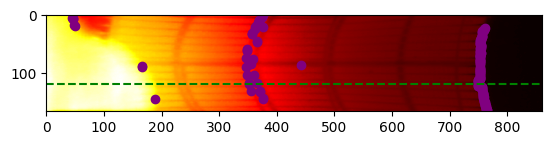

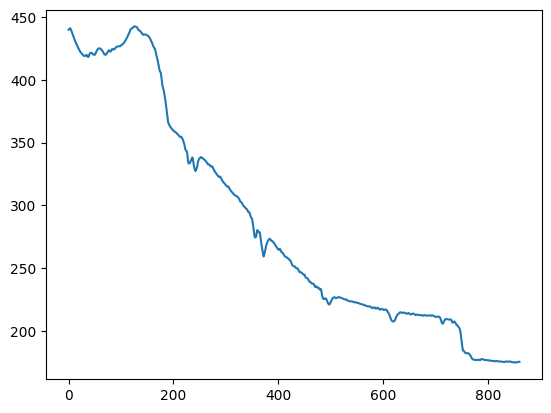

In [51]:
frame_number = 6
y = 120
ambient_weighting=1
frame = get_frame(dewarped_data,frame_number)
# frame = band_filter(frame,300,450)
y_data = frame[y,:]
plot_gradient(frame,y)
peak = highest_peak(y_data)
plt.axvline(x=peak, color='g', linestyle='--',label='highest')
peak = highest_peak_to_lowest_value(y_data,ambient_weighting=ambient_weighting)
plt.axvline(x=peak, color='r', linestyle='--',label='highest to lowest')
peak_method = lambda y_data: highest_peak_to_lowest_value(y_data,ambient_weighting=ambient_weighting,min_width=2)
plt.figure()
plot_edge(frame,peak_method)
plt.axhline(y=y, color='g', linestyle='--')
plt.figure()
plot_1D(frame,y)
plt.show()


In [34]:
import dataset_handler
dataset_handler.close_file()    